# Fourier Examples

## Introduction

Fourier series can be used to represent periodic functions as a sum of sine and cosine terms with different amplitudes and freqencies. For example, a function $f(t)$, with period $T$, can be written:

\begin{eqnarray}
\begin{array}{c}
f(t) = {a_0} + \sum\limits_{n = 1}^\infty  {{a_n}\cos \left( {\frac{{2n\pi t}}{T}} \right) + {b_n}\sin \left( {\frac{{2n\pi t}}{T}} \right).}
\end{array}
\end{eqnarray}

The coefficients $a_0$, $a_n$ and $b_n$ can be found using:

\begin{eqnarray}
\begin{array}{c}
\begin{aligned}
{a_0} &= \frac{1}{T}\int\limits_{ - \frac{T}{2}}^{\frac{T}{2}} {f(t)\,dt} \\
{a_n} &= \frac{2}{T}\int\limits_{ - \frac{T}{2}}^{\frac{T}{2}} {f(t)\cos \left( {\frac{{2n\pi t}}{T}} \right)\,dt} \\
{b_n} &= \frac{2}{T}\int\limits_{ - \frac{T}{2}}^{\frac{T}{2}} {f(t)\sin \left( {\frac{{2n\pi t}}{T}} \right)\,dt}. 
\end{aligned}
\end{array}
\end{eqnarray}

As an example, consider

\begin{eqnarray}
\begin{array}{c}
\begin{aligned}
f(t) &= 4 + 10t\,\,{\rm{ if}}\,\,{\rm{ }} -0.4 < t <  -0.3,\\
     &= 1\,\,{\rm{ if}}\,\,{\rm{ }} -0.3 < t < -0.1,\\
     &= - 10t\,\,{\rm{ if}}\,\,{\rm{ }} -0.1 < t < 0, \\
     &= 10t\,\,{\rm{ if}}\,\,{\rm{ }} 0 < t <  0.1,\\
     &= 1\,\,{\rm{ if}}\,\,{\rm{ }} 0.1 < t < 0.3,\\
     &= 4 - 10t\,\,{\rm{ if}}\,\,{\rm{ }} 0.3 < t  < 0.4.
\end{aligned}
\end{array}
\end{eqnarray}

In this case $T = 0.8$. A graph of $f(t)$ is shown below.

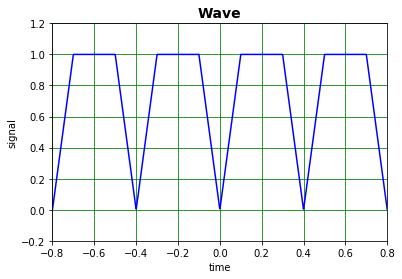

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from matplotlib import cm
import sympy as sp
from IPython.display import display, Markdown, Latex
#
# define the flat triangle function
def FlatTri(t, T):
    '''
    Flat triangle function centered on zero with period T
    '''
    lArr = len(t)
    Tarr = T*np.ones(lArr)
    arg = t - ((t - T/2)//T)*T - T
    boolA = np.logical_and(-4*Tarr/(4*2) < arg, arg < -3*Tarr/(4*2))
    boolB = np.logical_and(-3*Tarr/(4*2) < arg, arg < -1*Tarr/(4*2))
    boolC = np.logical_and(-1*Tarr/(4*2) < arg, arg < 0*Tarr/(4*2))
    boolD = np.logical_and(0*Tarr/(4*2) < arg, arg < 1*Tarr/(4*2))
    boolE = np.logical_and(1*Tarr/(4*2) < arg, arg < 3*Tarr/(4*2))
    boolF = np.logical_and(3*Tarr/(4*2) < arg, arg < 4*Tarr/(4*2))
    fA = 4 + 10*arg
    fB = np.ones(lArr)
    fC = -10*arg
    fD = 10*arg
    fE = np.ones(lArr)
    fF = 4 - 10*arg
    #
    f = boolA*fA + boolB*fB + boolC*fC + boolD*fD + boolE*fE + boolF*fF
    #
    return f
#
T = 0.8
nT = 1000
tBot = -0.8
tTop = 0.8
tArr = np.linspace(tBot, tTop, nT)
fArr = np.zeros(nT)
fArr = FlatTri(tArr, T)
#
plt.figure(figsize = (6, 4))
plt.plot(tArr, fArr, linestyle = '-', color = 'b')
plt.title("Wave", size = 14, weight = "bold")
plt.xlabel("time")
plt.ylabel("signal")
plt.xlim(tBot, tTop)
plt.ylim(-0.2, 1.2)
plt.grid(color = 'g')
plt.savefig("FlatTriangle.png")
plt.show()

Calculate $a_0$:

In [2]:
t = sp.Symbol("t")
a0 = 1/T*(sp.integrate(4 + 10*t, (t, -0.4, -0.3)) + sp.integrate(1, (t, -0.3, -0.1)) + 
          sp.integrate(-10*t, (t, -0.1, 0.0)) + sp.integrate(10*t, (t, 0.0, 0.1)) + 
          sp.integrate(1, (t, 0.1, 0.3)) + sp.integrate(4 - 10*t, (t, 0.3, 0.4)))
display(Markdown("$a_0 = " + sp.latex(a0) + "$"))

$a_0 = 0.75$

Determine the expression for the $a_n$:

In [3]:
n = sp.Symbol("n")
an = 2/T*(sp.integrate((4 + 10*t)*sp.cos(2*n*sp.pi*t/T), (t, -0.4, -0.3)) + 
          sp.integrate(sp.cos(2*n*sp.pi*t/T), (t, -0.3, -0.1)) + 
          sp.integrate(-10*t*sp.cos(2*n*sp.pi*t/T), (t, -0.1, 0.0)) +
          sp.integrate(10*t*sp.cos(2*n*sp.pi*t/T), (t, 0.0, 0.1)) + 
          sp.integrate(sp.cos(2*n*sp.pi*t/T), (t, 0.1, 0.3)) + 
          sp.integrate((4 - 10*t)*sp.cos(2*n*sp.pi*t/T), (t, 0.3, 0.4)))
display(Markdown("$a_n = " + sp.latex(sp.simplify(an)) + "$"))

$a_n = \begin{cases} - \frac{1.0 \left(8.88178419700125 \cdot 10^{-16} \pi n \sin{\left (0.75 \pi n \right )} - 8.0 \cos{\left (0.25 \pi n \right )} - 8.0 \cos{\left (0.75 \pi n \right )} + 8.0 \cos{\left (\pi n \right )} + 8.0\right)}{\pi^{2} n^{2}} & \text{for}\: n > -\infty \wedge n < \infty \wedge n \neq 0 \\1.5 & \text{otherwise} \end{cases}$

Check that the $b_n$ are zero:

In [4]:
bn = 2/T*(sp.integrate((4 + 10*t)*sp.sin(2*n*sp.pi*t/T), (t, -0.4, -0.3)) + 
          sp.integrate(sp.sin(2*n*sp.pi*t/T), (t, -0.3, -0.1)) + 
          sp.integrate(-10*t*sp.sin(2*n*sp.pi*t/T), (t, -0.1, 0.0)) +
          sp.integrate(10*t*sp.sin(2*n*sp.pi*t/T), (t, 0.0, 0.1)) + 
          sp.integrate(sp.sin(2*n*sp.pi*t/T), (t, 0.1, 0.3)) + 
          sp.integrate((4 - 10*t)*sp.sin(2*n*sp.pi*t/T), (t, 0.3, 0.4)))
display(Markdown("$b_n = " + sp.latex(sp.simplify(bn)) + "$"))

$b_n = 0$

Work out the values of the coefficients and plot the sum of the Fourier Series.

 
Fourier coefficients for flat triangle.
n	 an		 bn
0	 0.750000	 0.00
1	 0.000000	 0.00
2	 -0.405285	 0.00
3	 0.000000	 0.00
4	 -0.202642	 0.00
5	 -0.000000	 0.00
6	 -0.045032	 0.00
7	 0.000000	 0.00
8	 0.000000	 0.00
9	 0.000000	 0.00
10	 -0.016211	 0.00
11	 0.000000	 0.00
12	 -0.022516	 0.00
13	 -0.000000	 0.00
14	 -0.008271	 0.00
15	 -0.000000	 0.00
16	 0.000000	 0.00
17	 0.000000	 0.00
18	 -0.005004	 0.00
19	 0.000000	 0.00
 


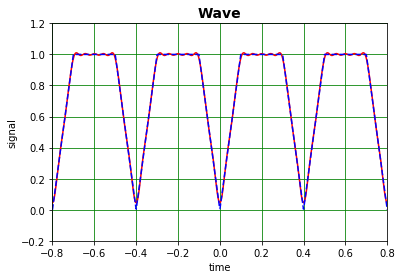

In [4]:
def coeffFlatTri(N, T):
    '''
    Fourier coefficients for flat triangle. 
    '''
    a = np.zeros(N)
    b = np.zeros(N)
    a[0] = 0.75
    for n in range(1, N):
        a[n] = (8*np.cos(0.25*np.pi*n) + 8*np.cos(0.75*np.pi*n) - 
                8*np.cos(np.pi*n) - 8)/(np.pi**2*n**2)
    return a, b
#
def fsSum(a, b, N, T, t):
    '''
    Sum of Fourier Series
    '''
    F = a[0]
    for n in range(1, N):
        F = F + a[n]*np.cos(2*n*np.pi*t/T) + b[n]*np.sin(2*n*np.pi*t/T)
    return F
#
N = 20
caFlatTri, cbFlatTri = coeffFlatTri(N, T)
np.set_printoptions(precision = 2)
print(" ")
print("Fourier coefficients for flat triangle.") 
print("n\t an\t\t bn")
for n in range(0, N):
    print("{:d}\t {:.6f}\t {:.2f}".format(n, caFlatTri[n], cbFlatTri[n]))
#
tArrS = np.linspace(tBot, tTop, nT)
fArrS = np.zeros(nT)
for i in range(0, nT):
    fArrS[i] = fsSum(caFlatTri, cbFlatTri, N, T, tArr[i])
print(" ")
#
plt.figure(figsize = (6, 4))
plt.plot(tArrS, fArrS, color = 'r', linestyle = '-')
plt.plot(tArr, fArr, color = 'b', linestyle = '--')
plt.title("Wave", size = 14, weight = "bold")
plt.xlabel("time")
plt.ylabel("signal")
plt.xlim(tBot, tTop)
plt.ylim(-0.2, 1.2)
plt.grid(color = 'g')
plt.savefig("FlatTriFourier.png")
plt.show()

Look at individual terms in the Fourier Series.

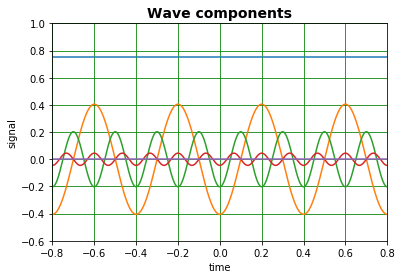

In [7]:
def fsTerm(a, b, n, T, t):
    '''
    Term in Fourier Series.
    '''
    N = a.shape[0]
    if n == 0:
        F = a[0]
    elif n > 0 and n <= N:
        F = a[n]*np.cos(2*n*np.pi*t/T) + b[n]*np.sin(2*n*np.pi*t/T)
    else:
        print("Requested term has not been calculated ")
        F = 0
    return F
#
tArrT = np.linspace(tBot, tTop, nT)
nTerms = 10
fArray = np.zeros([nT, nTerms])
for n in range(0, nTerms):
    for i in range(0, nT):
        fArray[i, n] = fsTerm(caFlatTri, cbFlatTri, n, T, tArrT[i])
    #
print(" ")
plt.figure(figsize = (6, 4))
plt.plot(tArrT,fArray[:,0])
plt.plot(tArrT,fArray[:,2])
plt.plot(tArrT,fArray[:,4])
plt.plot(tArrT,fArray[:,6])
plt.plot(tArrT,fArray[:,8])
plt.title("Wave components", size = 14, weight = "bold")
plt.xlabel("time")
plt.ylabel("signal")
plt.xlim(tBot, tTop)
plt.ylim(-0.6, 1.0)
plt.grid(color = 'g')
plt.savefig("FlatTriangleComponents.png")
plt.show()

Add up successive terms:

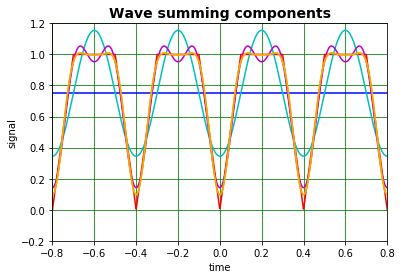

In [13]:
print(" ")
plt.figure(figsize = (6, 4))
plt.plot(tArr, fArr, color = 'r')
plt.plot(tArrT, fArray[:,0], color = 'b')
plt.plot(tArrT, fArray[:,0] + fArray[:,2], color = 'c')
plt.plot(tArrT, fArray[:,0] + fArray[:,2] + fArray[:,4], color = 'm')
plt.plot(tArrT, fArray[:,0] + fArray[:,2] + fArray[:,4] + fArray[:,6], color = 'y')
plt.plot(tArrT, fArray[:,0] + fArray[:,2] + fArray[:,4] + fArray[:,6] + fArray[:,8], color = 'orange')
plt.xlim(tBot, tTop)
plt.ylim(-0.2, 1.2)
plt.title("Wave summing components", size = 14, weight = "bold")
plt.xlabel("time")
plt.ylabel("signal")
plt.grid(color = 'g')
plt.savefig("FlatTriangleSumComponents.png")
plt.show()

## Alternative formulation

If the range over which the function is defined starts at $t = 0$ rather than being symmetric about this point, an alternative formulation of the expressions for determining the coefficients $a_0$, $a_n$ and $b_n$ may be more useful:

\begin{eqnarray}
\begin{array}{c}
\begin{aligned}
{a_0} &= \frac{1}{T}\int\limits_0^T {f(t)\,dt} \\
{a_n} &= \frac{2}{T}\int\limits_0^T {f(t)\cos \left( {\frac{{2n\pi t}}{T}} \right)\,dt} \\
{b_n} &= \frac{2}{T}\int\limits_0T^{\frac{T}{2}} {f(t)\sin \left( {\frac{{2n\pi t}}{T}} \right)\,dt}. 
\end{aligned}
\end{array}
\end{eqnarray}

An example, closely related to the above is:

\begin{eqnarray}
\begin{array}{c}
\begin{aligned}
f(t) &= 10t\,\,{\rm{ if}}\,\,{\rm{ }} 0 < t <  0.1,\\
     &= 1\,\,{\rm{ if}}\,\,{\rm{ }} 0.1 < t < 0.3,\\
     &= 4 - 10t\,\,{\rm{ if}}\,\,{\rm{ }} 0.3 < t  < 0.4.
\end{aligned}
\end{array}
\end{eqnarray}

We now have $T = 0.4.$ The graph of $f(t),$ shown below, is the same as that above.

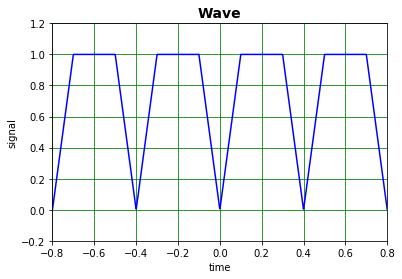

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from matplotlib import cm
import sympy as sp
from IPython.display import display, Markdown, Latex
#
# define the (asymmetric) flat triangle function
def FlatTriA(t, T):
    '''
    Flat triangle function centered on zero with period T
    '''
    lArr = len(t)
    Tarr = T*np.ones(lArr)
    arg = t - ((t - T/2)//T)*T - T
    boolD = np.logical_and(0*Tarr/(4*2) < arg, arg < 1*Tarr/(4*2))
    boolE = np.logical_and(1*Tarr/(4*2) < arg, arg < 3*Tarr/(4*2))
    boolF = np.logical_and(3*Tarr/(4*2) < arg, arg < 4*Tarr/(4*2))
    fD = 10*arg
    fE = np.ones(lArr)
    fF = 4 - 10*arg
    #
    f = boolD*fD + boolE*fE + boolF*fF
    #
    return f
#
T = 0.4
nT = 1000
tBot = -0.8
tTop = 0.8
tArr = np.linspace(tBot, tTop, nT)
fArr = np.zeros(nT)
fArr = FlatTri(tArr, 2*T)
plt.figure(figsize = (6, 4))
plt.title("Wave", size = 14, weight = "bold")
plt.plot(tArr, fArr, linestyle = '-', color = 'b')
plt.xlabel("time")
plt.ylabel("signal")
plt.xlim(tBot, tTop)
plt.ylim(-0.2, 1.2)
plt.grid(color = 'g')
plt.savefig("FlatTriangleA.png")
plt.show()

Calculate $a_0$:

In [9]:
t = sp.Symbol("t")
a0 = 1/T*(sp.integrate(10*t, (t, 0.0, 0.1)) + sp.integrate(1, (t, 0.1, 0.3)) + 
          sp.integrate(4 - 10*t, (t, 0.3, 0.4)))
display(Markdown("$a_0 = " + sp.latex(a0) + "$"))

$a_0 = 0.75$

Determine the expression for the $a_n$:

In [10]:
n = sp.Symbol("n")
an = 2/T*(sp.integrate(10*t*sp.cos(2*n*sp.pi*t/T), (t, 0.0, 0.1)) + 
          sp.integrate(sp.cos(2*n*sp.pi*t/T), (t, 0.1, 0.3)) + 
          sp.integrate((4 - 10*t)*sp.cos(2*n*sp.pi*t/T), (t, 0.3, 0.4)))
display(Markdown("$a_n = " + sp.latex(sp.simplify(an)) + "$"))

$a_n = \begin{cases} - \frac{1.0 \left(4.44089209850063 \cdot 10^{-16} \pi n \sin{\left (1.5 \pi n \right )} - 2.0 \cos{\left (0.5 \pi n \right )} - 2.0 \cos{\left (1.5 \pi n \right )} + 2.0 \cos{\left (2.0 \pi n \right )} + 2.0\right)}{\pi^{2} n^{2}} & \text{for}\: n > -\infty \wedge n < \infty \wedge n \neq 0 \\1.5 & \text{otherwise} \end{cases}$

Check that the $b_n$ are zero (which is the case even though sympy doesn't recognise this because of precision issues!):

In [11]:
bn = 2/T*(sp.integrate(10*t*sp.sin(2*n*sp.pi*t/T), (t, 0.0, 0.1)) + 
          sp.integrate(sp.sin(2*n*sp.pi*t/T), (t, 0.1, 0.3)) + 
          sp.integrate((4 - 10*t)*sp.sin(2*n*sp.pi*t/T), (t, 0.3, 0.4)))
display(Markdown("$b_n = " + sp.latex(sp.simplify(bn)) + "$"))

$b_n = \begin{cases} \frac{1.0 \left(4.44089209850063 \cdot 10^{-16} \pi n \cos{\left (1.5 \pi n \right )} + 2.0 \sin{\left (0.5 \pi n \right )} + 2.0 \sin{\left (1.5 \pi n \right )} - 2.0 \sin{\left (2.0 \pi n \right )}\right)}{\pi^{2} n^{2}} & \text{for}\: n > -\infty \wedge n < \infty \wedge n \neq 0 \\0 & \text{otherwise} \end{cases}$

Work out the values of the coefficients and plot the sum of the Fourier Series.

 
Fourier coefficients for, respectively, asymmetric and symmetric flat triangles.
n	 anA		 an
0	 0.750000	 0.750000
1	 -0.405285	 0.000000
2	 -0.202642	 -0.405285
3	 -0.045032	 0.000000
4	 0.000000	 -0.202642
5	 -0.016211	 -0.000000
6	 -0.022516	 -0.045032
7	 -0.008271	 0.000000
8	 0.000000	 0.000000
9	 -0.005004	 0.000000
10	 -0.008106	 -0.016211
11	 -0.003349	 0.000000
12	 0.000000	 -0.022516
13	 -0.002398	 -0.000000
14	 -0.004136	 -0.008271
15	 -0.001801	 -0.000000
16	 0.000000	 0.000000
17	 -0.001402	 0.000000
18	 -0.002502	 -0.005004
19	 -0.001123	 0.000000
 


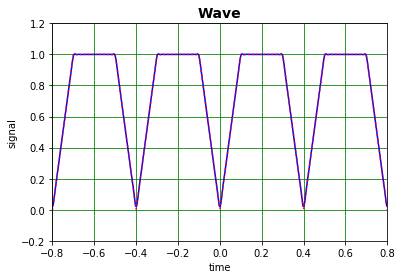

In [19]:
def coeffFlatTriA(N, T):
    '''
    Fourier coefficients for flat triangle. 
    '''
    a = np.zeros(N)
    b = np.zeros(N)
    a[0] = 0.75
    for n in range(1, N):
        a[n] = (2*np.cos(0.5*np.pi*n) + 2*np.cos(1.5*np.pi*n) - 4)/(np.pi**2*n**2)
        b[n] = (2*np.sin(0.5*np.pi*n) + 2*np.sin(1.5*np.pi*n))/(np.pi**2*n**2)
    return a, b
#
def fsSum(a, b, N, T, t):
    '''
    Sum of Fourier Series
    '''
    F = a[0]
    for n in range(1, N):
        F = F + a[n]*np.cos(2*n*np.pi*t/T) + b[n]*np.sin(2*n*np.pi*t/T)
    return F
#
N = 20
caFlatTriA, cbFlatTriA = coeffFlatTriA(N, T)
np.set_printoptions(precision = 2)
print(" ")
print("Fourier coefficients for, respectively, asymmetric and symmetric flat triangles.") 
print("n\t anA\t\t an")
for n in range(0, N):
    print("{:d}\t {:.6f}\t {:.6f}".format(n, caFlatTriA[n], caFlatTri[n]))
#
tArrS = np.linspace(tBot, tTop, nT)
fArrS = np.zeros(nT)
for i in range(0, nT):
    fArrS[i] = fsSum(caFlatTriA, cbFlatTriA, N, T, tArr[i])
print(" ")
plt.figure(figsize = (6, 4))
plt.plot(tArrS, fArrS, color = 'b', linestyle = '-')
plt.plot(tArr, fArr, color = 'r', linestyle = ':')
plt.title("Wave", size = 14, weight = "bold")
plt.xlabel("time")
plt.ylabel("signal")
plt.xlim(tBot, tTop)
plt.ylim(-0.2, 1.2)
plt.grid(color = 'g')
plt.savefig("FlatTriFourierA.png")
plt.show()